# Anthropic Playbook

<p>
Mal Minhas, v0.1<br>
19.07.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 19.07.24. First version</li>
</ul>
</p>

### 1. Configuration

Read [here about about accessing the Claude API](https://support.anthropic.com/en/articles/8114521-how-can-i-access-the-claude-api) programmatically.  Note that you will need to load some credits [into your plan here](https://console.anthropic.com/settings/plans) otherwise you will see this error message:

`BadRequestError: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Claude API. Please go to Plans & Billing to upgrade or purchase credits.'}}`

Once you are all set up with credits and an API key, you can proceed with using the Anthropiic API.

See [here](https://docs.anthropic.com/en/docs/about-claude/models) for a list of supported models.  At time of writing they are as follows below.  We will be using Claude 3.5 Sonnet:
<div>
<img src="models.png" width="600"/>  
</div>

### 2. Basic Usage

Below is an example of how to use the Anthropic API using a pre-built `anthropic` Python library taken from [here](https://docs.anthropic.com/en/docs/quickstart):

In [1]:
import os
import anthropic

ANTHROPIC_API_KEY = os.environ.get('ANTHROPIC_API_KEY')
client = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)

message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=1000,
    temperature=0,
    system="You are a world-class poet. Respond only with short poems.",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Why is the ocean salty?"
                }
            ]
        }
    ]
)

In [2]:
from IPython.display import display, Markdown

def renderMe(text):
    display(Markdown(text))
    
renderMe(message.content[0].text)

Waves crash and foam,
Earth's tears flow to sea,
Eons of minerals
Dissolved endlessly.

Salt from ancient rocks,
Carried by rivers' might,
Accumulates in depths,
A briny appetite.

### 3. Sentiment Analysis and coding example

Let's start with a simple example where we want to determine the sentiment analysis of a review comment.  We'll build a `completeMe` function to support this:

In [3]:
def completeMe(prompt, direction="You are a helpful coding assistant", model="claude-3-5-sonnet-20240620"):
    message = client.messages.create(
        model=model,
        max_tokens=1000,
        temperature=0,
        system=directions,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt
                    }
                ]
            }
        ]
    )
    return message.content[0].text

directions = "Your task is to analyze the provided tweet and identify the primary tone and sentiment expressed by the author. \
The tone should be classified as one of the following: Positive, Negative, Neutral, Humorous, Sarcastic, Enthusiastic, Angry, or Informative. \
The sentiment should be classified as Positive, Negative, or Neutral. Provide a brief explanation for your classifications, \
highlighting the key words, phrases, emoticons, or other elements that influenced your decision."
review = "Wow, I'm so impressed by the company's handling of this crisis. 🙄 They really have their priorities straight. #sarcasm #fail"
renderMe(completeMe(review, directions))

Tone: Sarcastic

Sentiment: Negative

Explanation:
The tone of this tweet is clearly sarcastic, and the sentiment is negative. Here are the key elements that support this classification:

1. The use of "Wow" and "so impressed" at the beginning would typically indicate a positive sentiment, but the context and following elements reveal it's not sincere.

2. The rolling eyes emoji (🙄) is a strong indicator of sarcasm and disapproval.

3. The phrase "They really have their priorities straight" is likely meant to imply the opposite - that the company's priorities are misaligned.

4. The hashtag #sarcasm explicitly confirms the sarcastic tone of the tweet.

5. The hashtag #fail further emphasizes the negative sentiment towards the company's actions.

The author is using sarcasm to criticize the company's handling of a crisis, expressing disappointment and disapproval. The overall message is negative, despite the seemingly positive words at the beginning.

Now we will try a coding example.

In [4]:
directions = "You are a helpful Python coding assistant."
review = "Write a Python function and supporting code that draws a Mandelbrot set"
renderMe(completeMe(review, directions))

Certainly! Here's a Python function and supporting code that draws a Mandelbrot set using the matplotlib library for visualization:

```python
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, max_iter):
    """
    Generate a Mandelbrot set image.
    
    Args:
    h (int): Height of the image
    w (int): Width of the image
    max_iter (int): Maximum number of iterations
    
    Returns:
    numpy.ndarray: 2D array representing the Mandelbrot set
    """
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

def plot_mandelbrot(h, w, max_iter):
    """
    Plot the Mandelbrot set.
    
    Args:
    h (int): Height of the image
    w (int): Width of the image
    max_iter (int): Maximum number of iterations
    """
    mandelbrot_set = mandelbrot(h, w, max_iter)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_set, cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
    plt.title('Mandelbrot Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.colorbar(label='Iteration count')
    plt.show()

# Example usage
plot_mandelbrot(1000, 1500, 100)
```

This code defines two main functions:

1. `mandelbrot(h, w, max_iter)`: This function generates the Mandelbrot set data. It takes the height, width, and maximum number of iterations as parameters. It returns a 2D numpy array representing the Mandelbrot set.

2. `plot_mandelbrot(h, w, max_iter)`: This function calls the `mandelbrot()` function to generate the set data and then uses matplotlib to plot the Mandelbrot set. It also takes height, width, and maximum iterations as parameters.

Here's a breakdown of how the code works:

- The `mandelbrot()` function uses numpy to efficiently compute the Mandelbrot set. It creates a complex plane, iterates the Mandelbrot function (z = z^2 + c) for each point, and keeps track of when each point diverges.

- The `plot_mandelbrot()` function calls `mandelbrot()` to get the set data, then uses matplotlib's `imshow()` function to display the set as an image. The 'hot' colormap is used, which gives a fiery appearance to the set.

- The example usage at the bottom calls `plot_mandelbrot()` with a height of 1000 pixels, a width of 1500 pixels, and a maximum of 100 iterations.

To use this code, you'll need to have numpy and matplotlib installed. You can install them using pip:

```
pip install numpy matplotlib
```

When you run this script, it will generate and display a colorful visualization of the Mandelbrot set. You can adjust the parameters in the `plot_mandelbrot()` call to change the resolution and detail of the image.

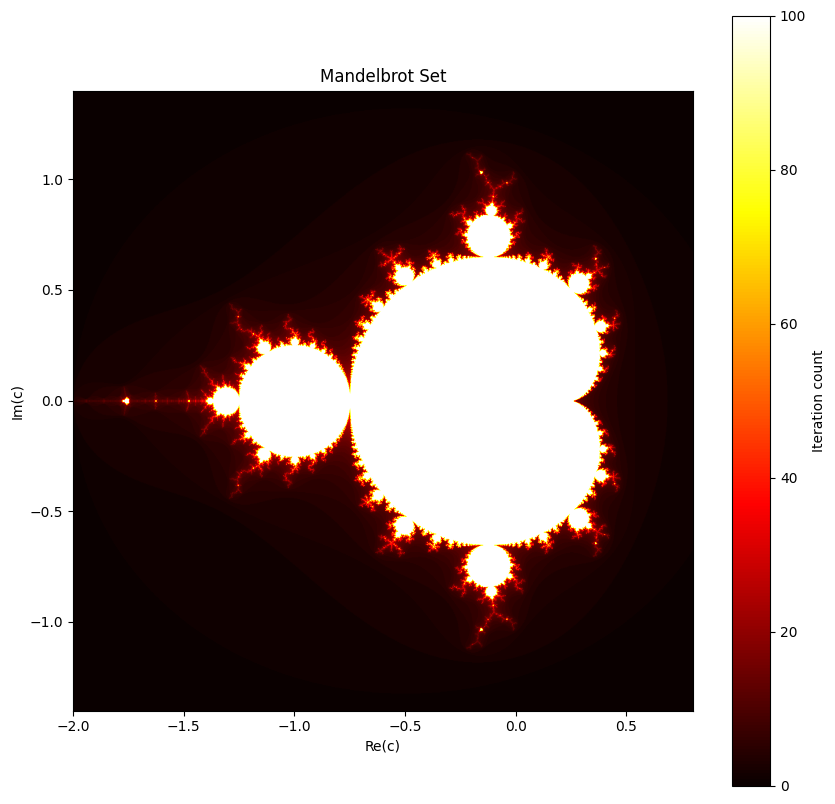

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, max_iter):
    """
    Generate a Mandelbrot set image.
    
    Args:
    h (int): Height of the image
    w (int): Width of the image
    max_iter (int): Maximum number of iterations
    
    Returns:
    numpy.ndarray: 2D array representing the Mandelbrot set
    """
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2

    return divtime

def plot_mandelbrot(h, w, max_iter):
    """
    Plot the Mandelbrot set.
    
    Args:
    h (int): Height of the image
    w (int): Width of the image
    max_iter (int): Maximum number of iterations
    """
    mandelbrot_set = mandelbrot(h, w, max_iter)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_set, cmap='hot', extent=[-2, 0.8, -1.4, 1.4])
    plt.title('Mandelbrot Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.colorbar(label='Iteration count')
    plt.show()

# Example usage
plot_mandelbrot(1000, 1500, 100)